# Welcome to the 'First steps with pandas'!

After this workshop you can (hopefully) call yourselves Data Scientists!

### Before coding, let's check whether we have proper versions of libraries

You should have:
- Python: 2.7.10
- numpy: 1.11.1
- pandas: 0.18.1
- matplotlib: 1.5.2

In [9]:
import platform
print "Python:", platform.python_version()
assert platform.python_version()[0] == '2'

import numpy as np
print 'numpy:', np.__version__

import pandas as pd
print 'pandas:', pd.__version__
assert pd.__version__[:4] == '0.18'

import scipy
print 'scipy:', scipy.__version__

import matplotlib as plt
print 'matplotlib:', plt.__version__

import flask
print 'flask:', flask.__version__

import jupyter
print 'jupyter:', jupyter.__version__

Python: 2.7.10
numpy: 1.11.1
pandas: 0.18.1
scipy: 0.18.1
matplotlib: 1.5.2
flask: 0.11.1
jupyter: 1.0.0


## What is pandas?

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Why to use it?

### We need to be able to develop code quickly and cheaply... and it should be readable

In [10]:
pd.read_json('http://stats.grok.se/json/en/201601/Python_(programming_language)') \
    .resample('1W') \
    .mean()['daily_views']
    
# if no internet
# pd.read_json('http://stats.grok.se/json/en/201601/Python_(programming_language)') \
#     .resample('1W') \
#     .mean()['daily_views']

# caching was done using
# pd.read_json('http://stats.grok.se/json/en/201601/Python_(programming_language)') \
#     .to_json('data/cached_python.json', orient='records')

2016-01-03    2767.666667
2016-01-10    4626.571429
2016-01-17    4871.857143
2016-01-24    5249.333333
Freq: W-SUN, Name: daily_views, dtype: float64

### We need to develop fast code

In [11]:
some_data = [ list(range(1,100)) for x in range(1,1000) ]
some_df = pd.DataFrame(some_data)

def standard_way(data):
    result = []
    for row in data:
        result.append([x*2 for x in row])
    return result


def pandas_way(df):
    return df * 2

In [12]:
%timeit standard_way(some_data)

100 loops, best of 3: 9.43 ms per loop


In [13]:
%timeit pandas_way(some_df)

The slowest run took 7.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 212 µs per loop


### It is hard write everything from scratch.. and it's easy to make mistakes.

http://pandas.pydata.org/pandas-docs/stable/api.html

### It can handle nicely missing data (and that's a common case)..

In [14]:
missing_data = pd.DataFrame([
    dict(name="Jacek", height=174),
    dict(name="Mateusz", weight=81),
    dict(name="Lionel Messi", height=169, weight=67)
])
missing_data

,height,name,weight
0,174.0,Jacek,NaN
1,NaN,Mateusz,81.0
2,169.0,Lionel Messi,67.0


In [15]:
missing_data.fillna(missing_data.mean())

,height,name,weight
0,174.0,Jacek,74.0
1,171.5,Mateusz,81.0
2,169.0,Lionel Messi,67.0


### It has a very cool name.

![caption](files/pandas.jpg)

###  Library highlights

http://pandas.pydata.org/#library-highlights

## So let's start by learning data structures

### Series

> Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [16]:
strengths = pd.Series([400, 200, 300, 400, 500])
strengths

0    400
1    200
2    300
3    400
4    500
dtype: int64

In [17]:
names = pd.Series(["Batman", "Robin", "Spiderman", "Robocop", "Terminator"])
names

0        Batman
1         Robin
2     Spiderman
3       Robocop
4    Terminator
dtype: object

### DataFrame

> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In [18]:
heroes = pd.DataFrame({
    'hero': names,
    'strength': strengths
})
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [19]:
other_heroes = pd.DataFrame([
    dict(hero="Hercules", strength=800),
    dict(hero="Konan")
])
other_heroes

,hero,strength
0,Hercules,800.0
1,Konan,NaN


In [20]:
another_heroes = pd.DataFrame([
    pd.Series(["Bolek", 10, 3], index=["hero", "strength", "cookies"]),
    pd.Series(["Lolek", 20, 0], index=["hero", "strength", "cookies"])
])
another_heroes

,hero,strength,cookies
0,Bolek,10,3
1,Lolek,20,0


In [21]:
another_heroes['cookies']

0    3
1    0
Name: cookies, dtype: int64

In [22]:
another_heroes[ ['hero', 'cookies'] ]

,hero,cookies
0,Bolek,3
1,Lolek,0


#### Selecting
```[string] --> Series
[ list of strings ] --> DataFrame```

### EXERCISE

Create such DataFrame in 3 different ways

```
                                         movie_title  imdb_score
0                                            Avatar          7.9
1          Pirates of the Caribbean: At World's End          7.1
2                                           Spectre          6.8
```

Help: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#from-dict-of-series-or-dicts

In [23]:
# Solution 1 with dict of Series

titles = pd.Series(["Avatar", "Pirates of the Caribbean: At World's End", "Spectre"])
imdb_scores = pd.Series([7.9, 7.1, 6.8])

pd.DataFrame({'movie_title': titles, 'imdb_score': imdb_scores})

,imdb_score,movie_title
0,7.9,Avatar
1,7.1,Pirates of the Caribbean: At World's End
2,6.8,Spectre


In [24]:
# Solution 2 with list of dicts

pd.DataFrame([
    dict(movie_title="Avatar", imdb_score=7.9),
    dict(movie_title="Pirates of the Caribbean: At World's End", imdb_score=7.1),
    dict(movie_title="Spectre", imdb_score=6.8),
])

,imdb_score,movie_title
0,7.9,Avatar
1,7.1,Pirates of the Caribbean: At World's End
2,6.8,Spectre


In [25]:
# Solution 3 with list of Series

pd.DataFrame([
    pd.Series(["Avatar", 7.9], index=['movie_title', 'imdb_score']),
    pd.Series(["Pirates of the Caribbean: At World's End", 7.1], index=['movie_title', 'imdb_score']),
    pd.Series(["Spectre", 6.8], index=['movie_title', 'imdb_score'])
])

,movie_title,imdb_score
0,Avatar,7.9
1,Pirates of the Caribbean: At World's End,7.1
2,Spectre,6.8


## I/O part I

In [26]:
# Uncomment and press tab..
# pd.read_
# SQL, csv, hdfs

In [27]:
# pd.read_csv?

In [28]:
!head data/cached_Python.json

[{"daily_views":2701,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":2829,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":2773,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":5072,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":5513,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":5233,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":5518,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":5312,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":2749,"month":201601,"project":"en","rank":2251,"title":"Python_(programming_language)"},{"daily_views":2989,"month":201601,"project":"en","rank":2251,"title":"P

In [29]:
pd.read_json('data/cached_Python.json').head()

,daily_views,month,project,rank,title
0,2701,201601,en,2251,Python_(programming_language)
1,2829,201601,en,2251,Python_(programming_language)
2,2773,201601,en,2251,Python_(programming_language)
3,5072,201601,en,2251,Python_(programming_language)
4,5513,201601,en,2251,Python_(programming_language)


### EXERCISE

1. Load movies from data/movie_metadata.csv and...
2. Analyze what dimensions and columns it has..

In [30]:
# Solution 1

#E: movies = 

movies = pd.read_csv('data/movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [31]:
# Solution 2

print movies.shape
print movies.columns

(5043, 28)
Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')


## Filtering

In [32]:
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [33]:
heroes['strength'] == 400

0     True
1    False
2    False
3     True
4    False
Name: strength, dtype: bool

In [34]:
heroes.strength == 400

0     True
1    False
2    False
3     True
4    False
Name: strength, dtype: bool

Boolean indexing

In [35]:
heroes[heroes['strength'] == 400]

,hero,strength
0,Batman,400
3,Robocop,400


In [36]:
heroes[heroes['strength'] > 400]

,hero,strength
4,Terminator,500


In [37]:
# heroes[200 < heroes['strength'] < 400]

In [38]:
heroes[
    (heroes['strength'] > 200) & 
    (heroes['strength'] < 400)
]

,hero,strength
2,Spiderman,300


In [39]:
heroes[
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
]

,hero,strength
0,Batman,400
1,Robin,200
3,Robocop,400
4,Terminator,500


`~` is a negation operator

In [40]:
~(heroes['strength'] == 400)

0    False
1     True
2     True
3    False
4     True
Name: strength, dtype: bool

In [41]:
heroes[~(
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
)]

,hero,strength
2,Spiderman,300


In [42]:
heroes[
    heroes['hero'].isin(['Batman', 'Robin'])
]

,hero,strength
0,Batman,400
1,Robin,200


### EXERCISE

1. What movies has been directed by Clint Eastwood?
2. What movies have earned above $500m?
3. Are there any Polish movies?
4. What % of movies are in color?
5. What are really popular great movies? (> 100k FB likes, > 8.5 IMDB score)
6. In what movies main role was played by brutals like "Jason Statham", "Sylvester Stallone" or god ("Morgan Freeman")?

In [43]:
# Solution 1

movies[movies['director_name'] == "Clint Eastwood"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
664,Black and White,Clint Eastwood,169.0,130.0,16000.0,416.0,Courtney B. Vance,16000.0,90454043.0,Action|Adventure|Thriller,...,326.0,English,USA,PG-13,65000000.0,2000.0,495.0,6.4,2.35,0
772,Color,Clint Eastwood,306.0,134.0,16000.0,204.0,Morgan Freeman,13000.0,37479778.0,Biography|Drama|History|Sport,...,259.0,English,USA,PG-13,60000000.0,2009.0,11000.0,7.4,2.35,23000
814,Color,Clint Eastwood,490.0,133.0,16000.0,318.0,Leonard Roberts,14000.0,350123553.0,Action|Biography|Drama|History|Thriller|War,...,916.0,English,USA,R,58800000.0,2014.0,962.0,7.3,2.35,112000
877,Color,Clint Eastwood,264.0,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,...,387.0,English,USA,R,55000000.0,2008.0,963.0,7.8,2.35,14000
906,Color,Clint Eastwood,279.0,135.0,16000.0,310.0,Chris Bauer,23000.0,33574332.0,Drama|History|War,...,415.0,English,USA,R,90000000.0,2006.0,638.0,7.1,2.35,0
973,Color,Clint Eastwood,76.0,121.0,16000.0,826.0,Mark Margolis,16000.0,50007168.0,Action|Crime|Drama|Thriller,...,142.0,English,USA,R,50000000.0,1997.0,1000.0,6.7,2.35,1000
997,Color,Clint Eastwood,315.0,129.0,16000.0,447.0,Jay Mohr,13000.0,32741596.0,Drama|Fantasy,...,323.0,English,USA,PG-13,50000000.0,2010.0,563.0,6.5,2.35,16000
1004,Color,Clint Eastwood,146.0,110.0,16000.0,581.0,Anjelica Huston,16000.0,26199517.0,Action|Crime|Drama|Mystery|Thriller,...,260.0,English,USA,R,50000000.0,2002.0,1000.0,6.4,2.35,705
1245,Color,Clint Eastwood,249.0,134.0,16000.0,235.0,Steve Schirripa,880.0,47034272.0,Biography|Drama|Music|Musical,...,190.0,English,USA,R,40000000.0,2014.0,413.0,6.9,2.35,16000
1453,Color,Clint Eastwood,392.0,137.0,16000.0,363.0,Naomi Watts,29000.0,37304950.0,Biography|Crime|Drama,...,279.0,English,USA,R,35000000.0,2011.0,6000.0,6.6,2.35,16000


In [44]:
# Solution 2

movies[movies['gross'] > 500e6]['movie_title']

0               Avatar 
17        The Avengers 
26             Titanic 
29      Jurassic World 
66     The Dark Knight 
794       The Avengers 
Name: movie_title, dtype: object

In [45]:
# Solution 3

movies[movies['language'] == 'Polish']['movie_title']

2824       Dekalog             
2828    The Border             
3207       Dekalog             
4170                       Ida 
Name: movie_title, dtype: object

In [46]:
# Solution 4

movies[movies['color'] == 'Color'].shape[0] / float(movies.shape[0])

0.9547888161808448

In [47]:
# Solution 5

movies[
    (movies['movie_facebook_likes'] > 100000) &
    (movies['imdb_score'] > 8.5)
]['movie_title']

96                  Interstellar 
97                     Inception 
1937    The Shawshank Redemption 
Name: movie_title, dtype: object

In [48]:
# Solution 6

brutals = ["Jason Statham", "Sylvester Stallone"]
god = "Morgan Freeman"

movies[
    (movies['actor_1_name'].isin(brutals)) |
    (movies['actor_1_name'] == god) 
]['movie_title'].head()

45             Furious 7 
235             Oblivion 
299    The Expendables 2 
317    The Expendables 3 
367              Ben-Hur 
Name: movie_title, dtype: object

## I/O part O

In [49]:
heroes.values

array([['Batman', 400],
       ['Robin', 200],
       ['Spiderman', 300],
       ['Robocop', 400],
       ['Terminator', 500]], dtype=object)

In [50]:
heroes.to_dict()

{'hero': {0: 'Batman',
  1: 'Robin',
  2: 'Spiderman',
  3: 'Robocop',
  4: 'Terminator'},
 'strength': {0: 400, 1: 200, 2: 300, 3: 400, 4: 500}}

In [51]:
heroes.to_dict('records')

[{'hero': 'Batman', 'strength': 400},
 {'hero': 'Robin', 'strength': 200},
 {'hero': 'Spiderman', 'strength': 300},
 {'hero': 'Robocop', 'strength': 400},
 {'hero': 'Terminator', 'strength': 500}]

In [52]:
print heroes.to_json()

{"hero":{"0":"Batman","1":"Robin","2":"Spiderman","3":"Robocop","4":"Terminator"},"strength":{"0":400,"1":200,"2":300,"3":400,"4":500}}


In [53]:
print heroes.to_json(orient='records')

[{"hero":"Batman","strength":400},{"hero":"Robin","strength":200},{"hero":"Spiderman","strength":300},{"hero":"Robocop","strength":400},{"hero":"Terminator","strength":500}]


In [54]:
print heroes.to_csv()

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500



In [55]:
print heroes.to_csv(index=False)

hero,strength
Batman,400
Robin,200
Spiderman,300
Robocop,400
Terminator,500



### EXERCISE

1. Create a csv with movie titles and cast (actors) of movies with budget above $200m
2. Create a list of dicts with movie titles and facebook likes of all Christopher Nolan's movies

In [56]:
# Solution 1
cols = [
    'movie_title',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name', 
    'budget'
]

movies[movies['budget'] > 200e6][cols].to_csv("data/expensive-cast.csv", index=False)

In [57]:
# Solution 2

cols = [
    'movie_title',
    'movie_facebook_likes'
]

movies[movies['director_name'] == 'Christopher Nolan'][cols].to_dict('r')

[{'movie_facebook_likes': 164000,
  'movie_title': 'The Dark Knight Rises\xc2\xa0'},
 {'movie_facebook_likes': 37000, 'movie_title': 'The Dark Knight\xc2\xa0'},
 {'movie_facebook_likes': 349000, 'movie_title': 'Interstellar\xc2\xa0'},
 {'movie_facebook_likes': 175000, 'movie_title': 'Inception\xc2\xa0'},
 {'movie_facebook_likes': 15000, 'movie_title': 'Batman Begins\xc2\xa0'},
 {'movie_facebook_likes': 0, 'movie_title': 'Insomnia\xc2\xa0'},
 {'movie_facebook_likes': 49000, 'movie_title': 'The Prestige\xc2\xa0'},
 {'movie_facebook_likes': 40000, 'movie_title': 'Memento\xc2\xa0'}]

## New columns

In [58]:
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [59]:
heroes['health'] = np.NaN
heroes.head()

,hero,strength,health
0,Batman,400,NaN
1,Robin,200,NaN
2,Spiderman,300,NaN
3,Robocop,400,NaN
4,Terminator,500,NaN


In [60]:
heroes['health'] = 100
heroes.head()

,hero,strength,health
0,Batman,400,100
1,Robin,200,100
2,Spiderman,300,100
3,Robocop,400,100
4,Terminator,500,100


In [61]:
heroes['height'] = [180, 170, 175, 190, 185]
heroes

,hero,strength,health,height
0,Batman,400,100,180
1,Robin,200,100,170
2,Spiderman,300,100,175
3,Robocop,400,100,190
4,Terminator,500,100,185


In [62]:
heroes['is_hungry'] = pd.Series([True, False, False, True, True])
heroes

,hero,strength,health,height,is_hungry
0,Batman,400,100,180,True
1,Robin,200,100,170,False
2,Spiderman,300,100,175,False
3,Robocop,400,100,190,True
4,Terminator,500,100,185,True


In [63]:
heroes['strength'] * 2

0     800
1     400
2     600
3     800
4    1000
Name: strength, dtype: int64

In [64]:
heroes['strength'] / heroes['height']

0    2.222222
1    1.176471
2    1.714286
3    2.105263
4    2.702703
dtype: float64

In [65]:
heroes['strength_per_cm'] = heroes['strength'] / heroes['height']
heroes

,hero,strength,health,height,is_hungry,strength_per_cm
0,Batman,400,100,180,True,2.222222
1,Robin,200,100,170,False,1.176471
2,Spiderman,300,100,175,False,1.714286
3,Robocop,400,100,190,True,2.105263
4,Terminator,500,100,185,True,2.702703


In [66]:
pd.Series([1, 2, 3]).map(lambda x: x**3)

0     1
1     8
2    27
dtype: int64

In [67]:
pd.Series(['Batman', 'Robin']).map(lambda x: x[:2])
# However there is also a covenient .str operator

0    Ba
1    Ro
dtype: object

In [68]:
pd.Series(['Batman', 'Robin']).str.lower()

0    batman
1     robin
dtype: object

In [69]:
pd.Series([
    ['Batman', 'Robin'],
    ['Robocop']
]).map(len)

0    2
1    1
dtype: int64

In [70]:
heroes['code'] = heroes['hero'].map(lambda name: name[:2])
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


In [71]:
heroes['effective_strength'] = heroes.apply(
    lambda row: (not row['is_hungry']) * row['strength'],
    axis=1
)
heroes.head()

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,400,100,180,True,2.222222,Ba,0
1,Robin,200,100,170,False,1.176471,Ro,200
2,Spiderman,300,100,175,False,1.714286,Sp,300
3,Robocop,400,100,190,True,2.105263,Ro,0
4,Terminator,500,100,185,True,2.702703,Te,0


In [72]:
heroes[['health', 'strength']] = heroes[['health', 'strength']].applymap(
    lambda x: x + 100
)
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,500,200,180,True,2.222222,Ba,0
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0


Cheatsheet

```
map: 1 => 1
apply: n => 1
applymap: n => n
```

In [73]:
# EXTRA 1
heroes['strength'].value_counts()

500    2
600    1
300    1
400    1
Name: strength, dtype: int64

In [74]:
# EXTRA 2
heroes.sort_values('strength')

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300
0,Batman,500,200,180,True,2.222222,Ba,0
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0


In [75]:
# EXTRA 3
heroes.sort_values(
    ['is_hungry', 'code'],
    ascending=[False, True]
)

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,500,200,180,True,2.222222,Ba,0
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300


#### EXERCISE

1. What are 10 most profitable movies? (ratio between gross and budget)
2. Create a column 'first_genre'. What is the distribution of values in this column?

In [76]:
# Solution 1

movies['profitability'] = movies['gross'] / movies['budget']
movies.sort_values('profitability', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profitability
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,7194.485533
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,2715.660550
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,2342.168567
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265,409.864000
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,369.427285
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,369.427285
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,291.560000
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,227.578190
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0,177.374892
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,156.666667


In [77]:
# Solution 2

movies['first_genre'] = movies['genres'].str.split('|').str[0]
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profitability,first_genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,3.208885,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1.031347,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0.816629,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1.792523,Action
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,Documentary


## Visualizing data

In [78]:
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,500,200,180,True,2.222222,Ba,0
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0


In [79]:
heroes.describe()

,strength,health,height,strength_per_cm,effective_strength
count,5.000000,5.0,5.000000,5.000000,5.000000
mean,460.000000,200.0,180.000000,1.984189,100.000000
std,114.017543,0.0,7.905694,0.572896,141.421356
min,300.000000,200.0,170.000000,1.176471,0.000000
25%,400.000000,200.0,175.000000,1.714286,0.000000
50%,500.000000,200.0,180.000000,2.105263,0.000000
75%,500.000000,200.0,185.000000,2.222222,200.000000
max,600.000000,200.0,190.000000,2.702703,300.000000


In [80]:
%matplotlib inline

/Users/jacekrzeszutek/.virtualenvs/first-steps-with-pandas/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


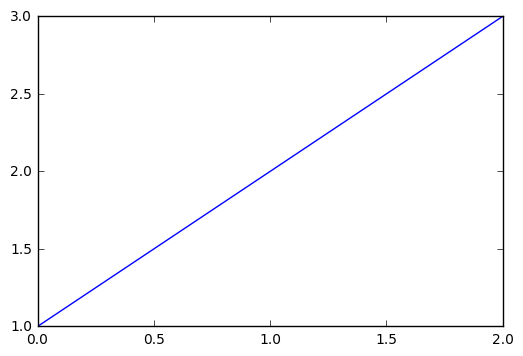

In [81]:
pd.Series([1, 2, 3]).plot()

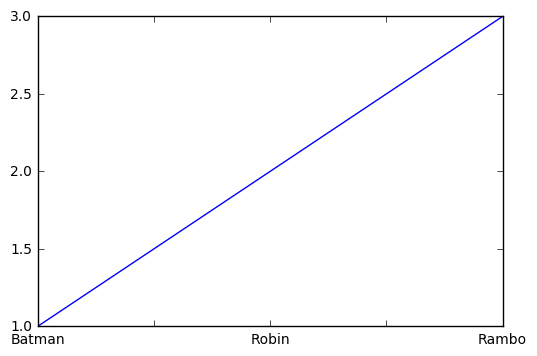

In [82]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot()

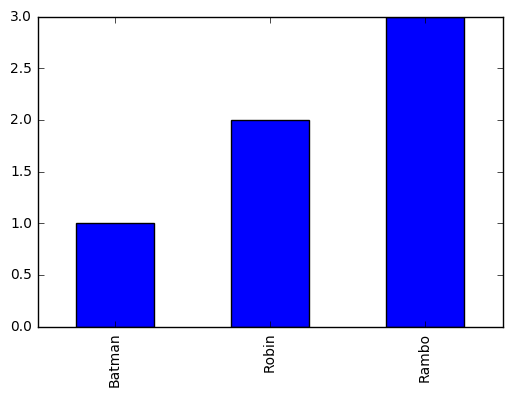

In [83]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='bar')

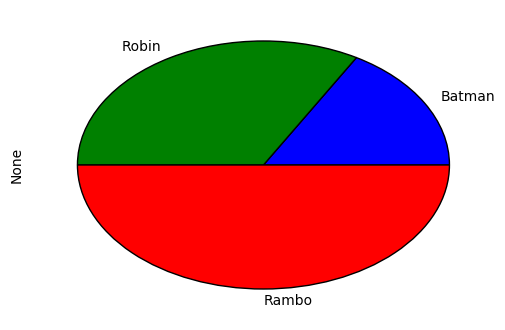

In [84]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='pie')

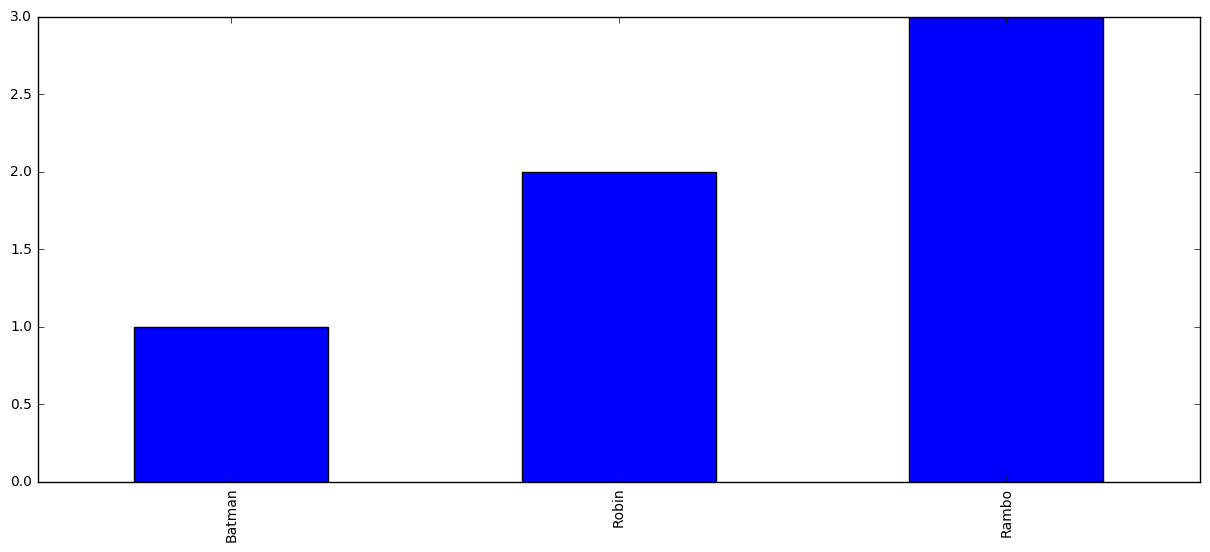

In [85]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(
    kind='bar',
    figsize=(15, 6)
)

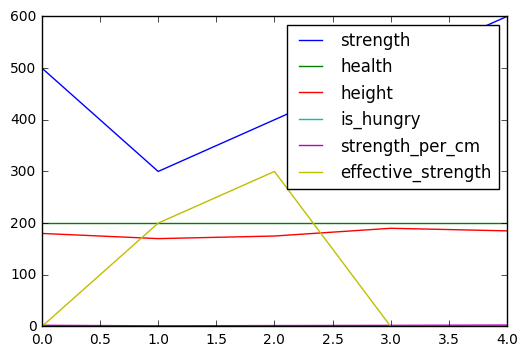

In [86]:
heroes.plot()

In [87]:
indexed_heroes = heroes.set_index('hero')
indexed_heroes

,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
hero,,,,,,,
Batman,500,200,180,True,2.222222,Ba,0
Robin,300,200,170,False,1.176471,Ro,200
Spiderman,400,200,175,False,1.714286,Sp,300
Robocop,500,200,190,True,2.105263,Ro,0
Terminator,600,200,185,True,2.702703,Te,0


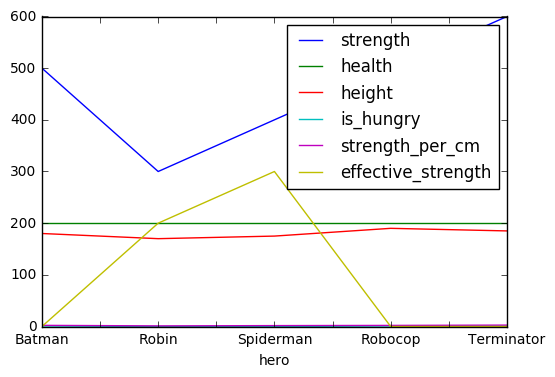

In [88]:
indexed_heroes.plot()

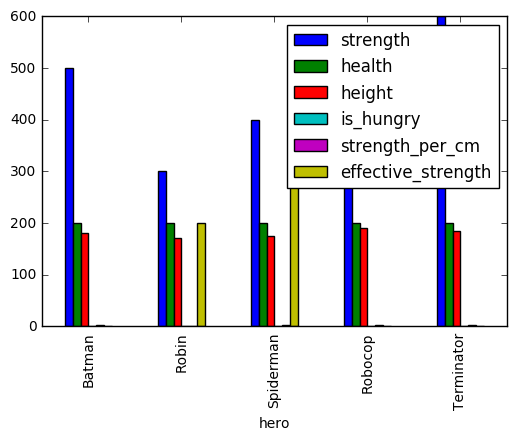

In [89]:
indexed_heroes.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b11b0d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b6a6910>], dtype=object)

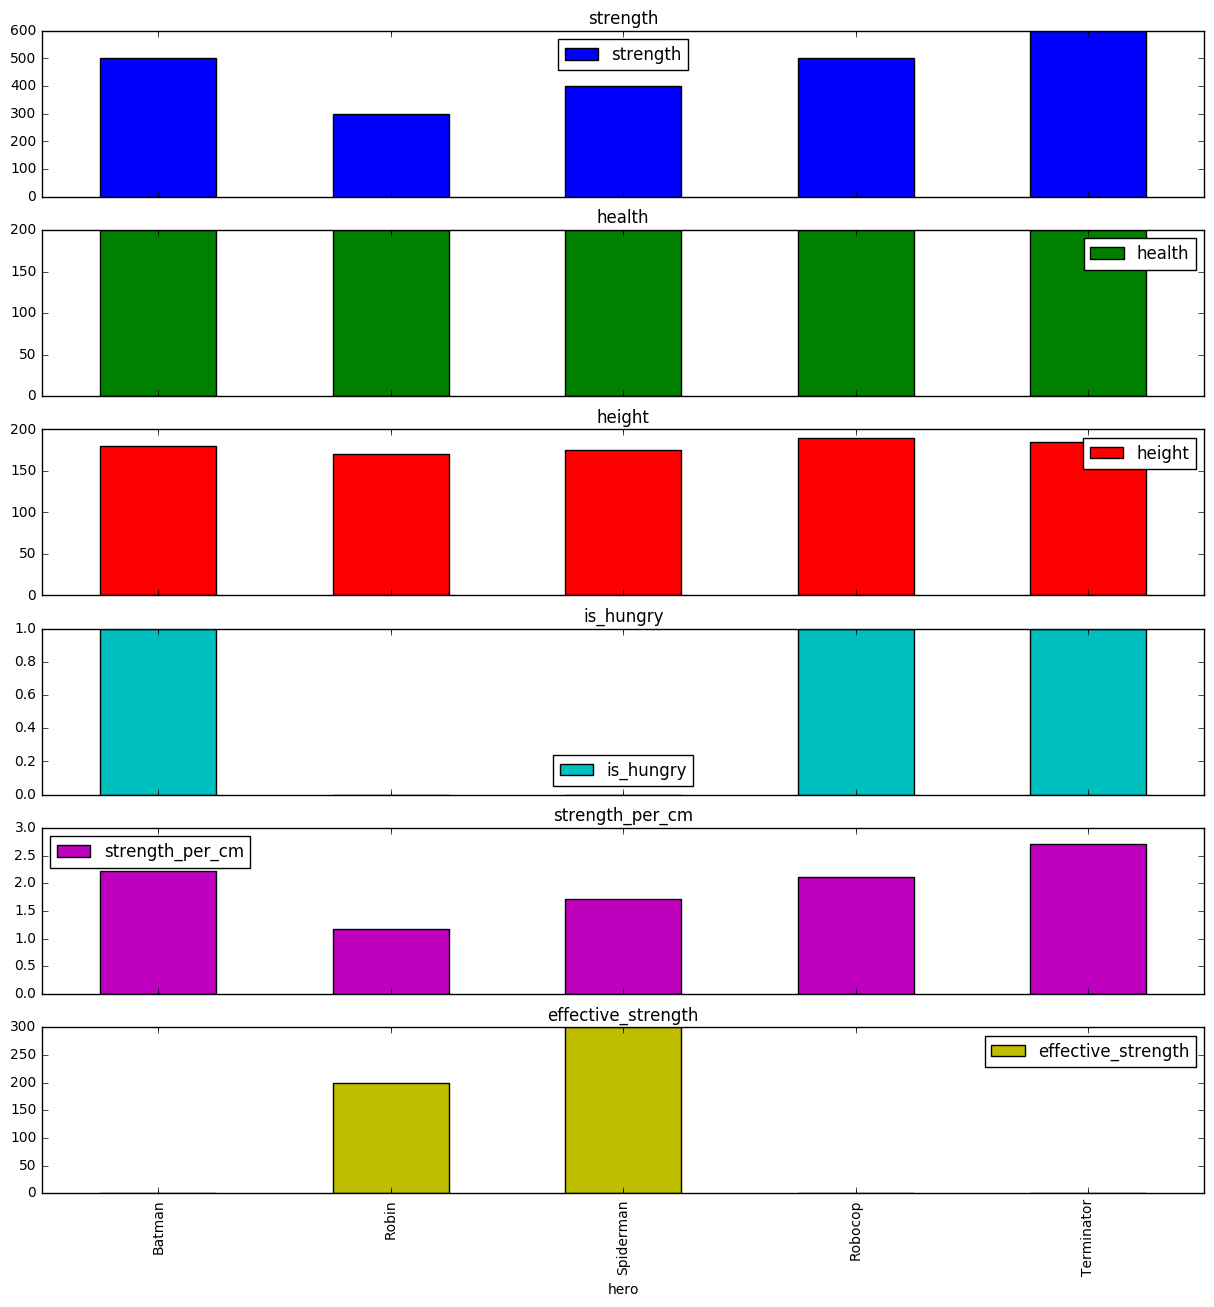

In [90]:
indexed_heroes.plot(kind='bar', subplots=True, figsize=(15, 15))

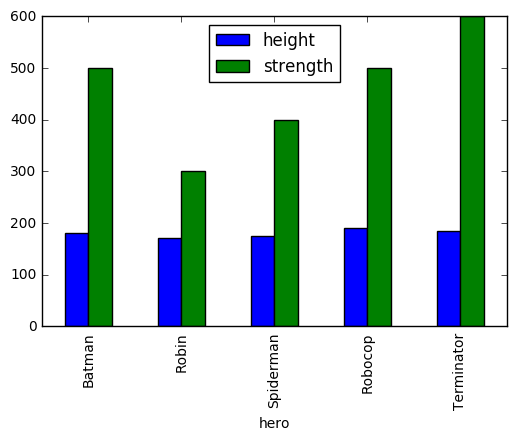

In [91]:
indexed_heroes[['height', 'strength']].plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c24f890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d160b10>]], dtype=object)

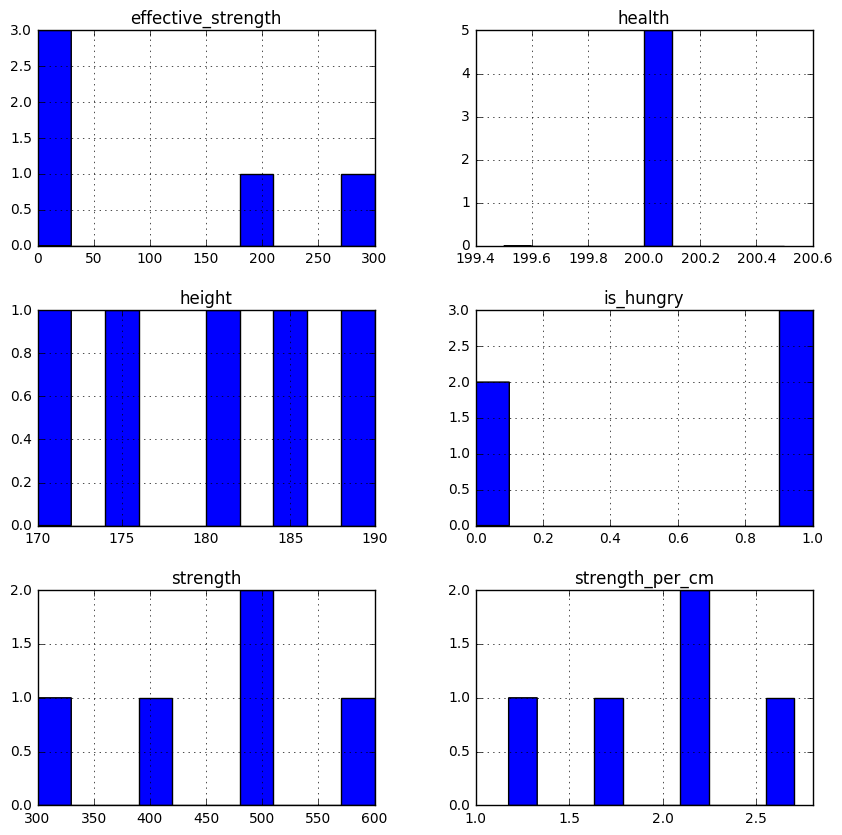

In [92]:
heroes.hist(figsize=(10, 10))

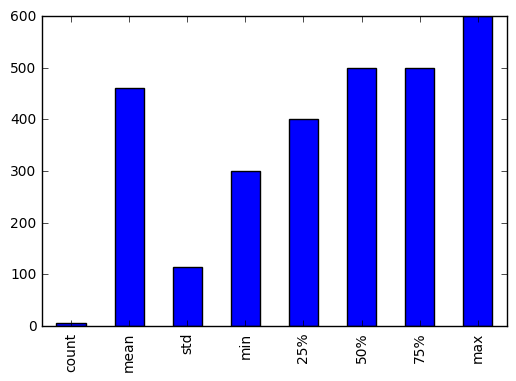

In [93]:
heroes.describe()['strength'].plot(kind='bar')

#### EXERCISE
1. Create a chart presenting grosses of movies directed by Christopher Nolan
2. What are typical durations of the movies?
3. What is percentage distribution of first genre? (cake)

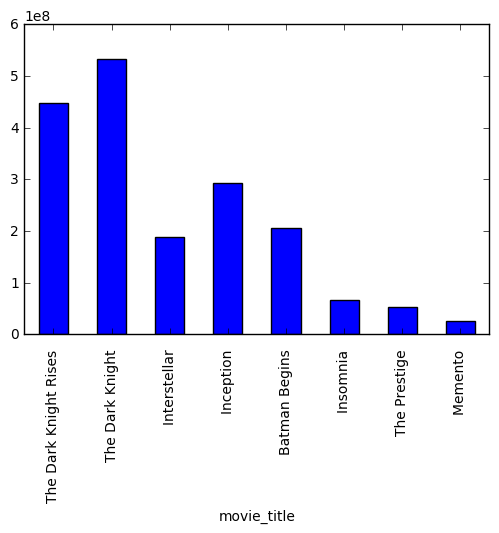

In [94]:
# Solution 1

nolan_movies = movies[movies['director_name'] == 'Christopher Nolan']
nolan_movies = nolan_movies.set_index('movie_title')

nolan_movies['gross'].plot(kind='bar')

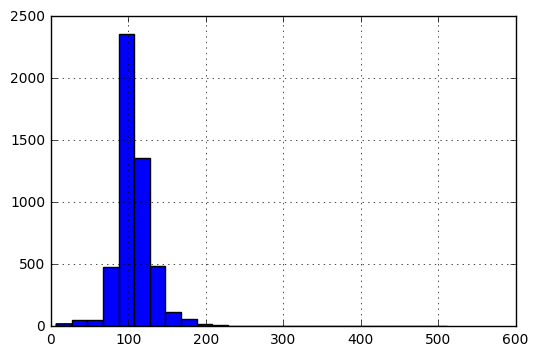

In [95]:
# Solution 2

movies['duration'].hist(bins=25)

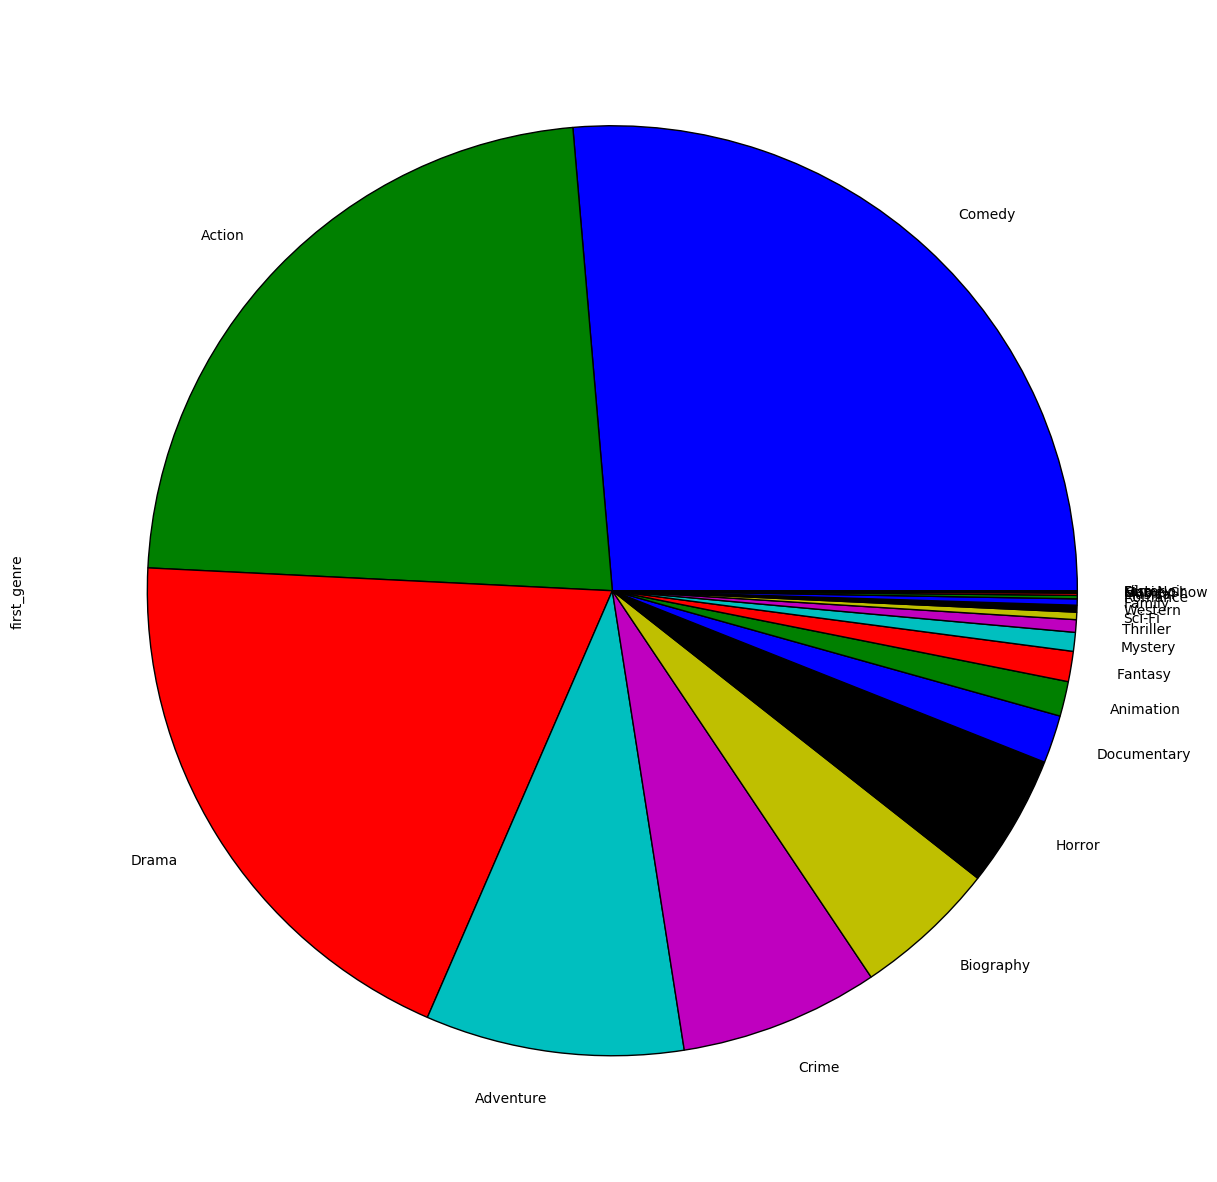

In [96]:
# Solution 3

movies['first_genre'].value_counts().plot(
    kind='pie',
    figsize=(15,15)
)

## Aggregation

In [97]:
movie_heroes = pd.DataFrame({
    'hero': ['Batman', 'Robin', 'Spiderman', 'Robocop', 'Lex Luthor'],
    'movie': ['Batman', 'Batman', 'Spiderman', 'Robocop', 'Spiderman'],
    'strength': [400, 100, 400, 560, 89],
    'speed': [100, 10, 200, 1, 30],
})
movie_heroes

,hero,movie,speed,strength
0,Batman,Batman,100,400
1,Robin,Batman,10,100
2,Spiderman,Spiderman,200,400
3,Robocop,Robocop,1,560
4,Lex Luthor,Spiderman,30,89


In [98]:
movie_heroes.groupby('movie')

In [99]:
list(movie_heroes.groupby('movie'))

[('Batman',      hero   movie  speed  strength
  0  Batman  Batman    100       400
  1   Robin  Batman     10       100),
 ('Robocop',       hero    movie  speed  strength
  3  Robocop  Robocop      1       560),
 ('Spiderman',          hero      movie  speed  strength
  2   Spiderman  Spiderman    200       400
  4  Lex Luthor  Spiderman     30        89)]

In [100]:
movie_heroes.groupby('movie').size()

movie
Batman       2
Robocop      1
Spiderman    2
dtype: int64

In [101]:
movie_heroes.groupby('movie').count()

,hero,speed,strength
movie,,,
Batman,2,2,2
Robocop,1,1,1
Spiderman,2,2,2


In [102]:
movie_heroes.groupby('movie')['speed'].sum()

movie
Batman       110
Robocop        1
Spiderman    230
Name: speed, dtype: int64

In [103]:
movie_heroes.groupby('movie').mean()

,speed,strength
movie,,
Batman,55.0,250.0
Robocop,1.0,560.0
Spiderman,115.0,244.5


In [104]:
movie_heroes.groupby('movie').apply(
    lambda row: row['speed'] * row['strength']
)

movie       
Batman     0    40000
           1     1000
Robocop    3      560
Spiderman  2    80000
           4     2670
dtype: int64

In [105]:
movie_heroes.groupby('movie').agg({
    'speed': 'mean',
    'strength': 'max',
})

,strength,speed
movie,,
Batman,400,55
Robocop,560,1
Spiderman,400,115


In [106]:
movie_heroes.groupby(['movie', 'hero']).size()

movie      hero      
Batman     Batman        1
           Robin         1
Robocop    Robocop       1
Spiderman  Lex Luthor    1
           Spiderman     1
dtype: int64

### EXERCISE
1. How many movies were produced every year?
2. Which director earns the most on average?

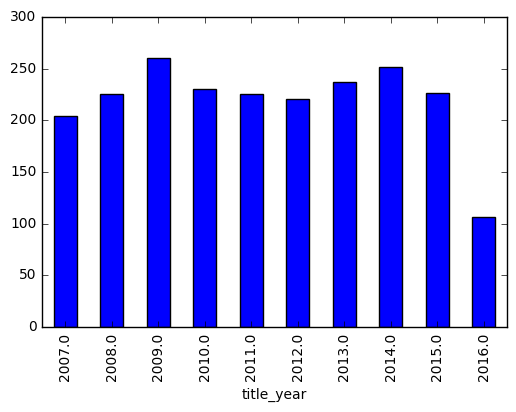

In [107]:
# Solution 1 

movies.groupby('title_year').size().tail(10).plot('bar')

In [108]:
# Solution 2

movies.groupby(
    'director_name'
)['gross'].mean()\
          .sort_values(ascending=False)\
          .head(3)

director_name
Joss Whedon    432721657.0
Lee Unkrich    414984497.0
Chris Buck     400736600.0
Name: gross, dtype: float64

# Index related operations

In [109]:
movie_heroes

,hero,movie,speed,strength
0,Batman,Batman,100,400
1,Robin,Batman,10,100
2,Spiderman,Spiderman,200,400
3,Robocop,Robocop,1,560
4,Lex Luthor,Spiderman,30,89


In [110]:
apetite = pd.DataFrame([
    dict(hero='Spiderman', is_hungry=True),
    dict(hero='Robocop', is_hungry=False)
])
apetite

,hero,is_hungry
0,Spiderman,True
1,Robocop,False


In [111]:
movie_heroes['is_hungry'] = apetite['is_hungry']
movie_heroes

,hero,movie,speed,strength,is_hungry
0,Batman,Batman,100,400,True
1,Robin,Batman,10,100,False
2,Spiderman,Spiderman,200,400,NaN
3,Robocop,Robocop,1,560,NaN
4,Lex Luthor,Spiderman,30,89,NaN


In [112]:
apetite.index = [2, 3]

In [113]:
movie_heroes['is_hungry'] = apetite['is_hungry']
movie_heroes

,hero,movie,speed,strength,is_hungry
0,Batman,Batman,100,400,NaN
1,Robin,Batman,10,100,NaN
2,Spiderman,Spiderman,200,400,True
3,Robocop,Robocop,1,560,False
4,Lex Luthor,Spiderman,30,89,NaN


In [114]:
indexed_movie_heroes = movie_heroes.set_index('hero')
indexed_movie_heroes

,movie,speed,strength,is_hungry
hero,,,,
Batman,Batman,100,400,NaN
Robin,Batman,10,100,NaN
Spiderman,Spiderman,200,400,True
Robocop,Robocop,1,560,False
Lex Luthor,Spiderman,30,89,NaN


In [115]:
indexed_apetite = apetite.set_index('hero')
indexed_apetite

,is_hungry
hero,
Spiderman,True
Robocop,False


In [116]:
indexed_movie_heroes['is_hungry'] = indexed_apetite['is_hungry']

In [117]:
indexed_movie_heroes

,movie,speed,strength,is_hungry
hero,,,,
Batman,Batman,100,400,NaN
Robin,Batman,10,100,NaN
Spiderman,Spiderman,200,400,True
Robocop,Robocop,1,560,False
Lex Luthor,Spiderman,30,89,NaN


In [118]:
spiderman_meals = pd.DataFrame([
        dict(time='2016-10-15 10:00', calories=300),
        dict(time='2016-10-15 13:00', calories=900),
        dict(time='2016-10-15 15:00', calories=1200),
        dict(time='2016-10-15 21:00', calories=700),
        dict(time='2016-10-16 07:00', calories=1600),
        dict(time='2016-10-16 13:00', calories=600),
        dict(time='2016-10-16 16:00', calories=900),
        dict(time='2016-10-16 20:00', calories=500),
        dict(time='2016-10-16 21:00', calories=300),
        dict(time='2016-10-17 08:00', calories=900),
    ])
spiderman_meals

,calories,time
0,300,2016-10-15 10:00
1,900,2016-10-15 13:00
2,1200,2016-10-15 15:00
3,700,2016-10-15 21:00
4,1600,2016-10-16 07:00
5,600,2016-10-16 13:00
6,900,2016-10-16 16:00
7,500,2016-10-16 20:00
8,300,2016-10-16 21:00
9,900,2016-10-17 08:00


In [119]:
spiderman_meals.dtypes

calories     int64
time        object
dtype: object

In [120]:
spiderman_meals['time'] = pd.to_datetime(spiderman_meals['time'])
spiderman_meals.dtypes

calories             int64
time        datetime64[ns]
dtype: object

In [121]:
spiderman_meals

,calories,time
0,300,2016-10-15 10:00:00
1,900,2016-10-15 13:00:00
2,1200,2016-10-15 15:00:00
3,700,2016-10-15 21:00:00
4,1600,2016-10-16 07:00:00
5,600,2016-10-16 13:00:00
6,900,2016-10-16 16:00:00
7,500,2016-10-16 20:00:00
8,300,2016-10-16 21:00:00
9,900,2016-10-17 08:00:00


In [122]:
spiderman_meals = spiderman_meals.set_index('time')
spiderman_meals

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 13:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 21:00:00,700
2016-10-16 07:00:00,1600
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500
2016-10-16 21:00:00,300


In [123]:
spiderman_meals.index

DatetimeIndex(['2016-10-15 10:00:00', '2016-10-15 13:00:00',
               '2016-10-15 15:00:00', '2016-10-15 21:00:00',
               '2016-10-16 07:00:00', '2016-10-16 13:00:00',
               '2016-10-16 16:00:00', '2016-10-16 20:00:00',
               '2016-10-16 21:00:00', '2016-10-17 08:00:00'],
              dtype='datetime64[ns]', name=u'time', freq=None)

In [124]:
spiderman_meals["2016-10-15"]

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 13:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 21:00:00,700


In [125]:
spiderman_meals["2016-10-16 10:00":]

,calories
time,
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500
2016-10-16 21:00:00,300
2016-10-17 08:00:00,900


In [126]:
spiderman_meals["2016-10-16 10:00":"2016-10-16 20:00"]

,calories
time,
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500


In [127]:
spiderman_meals["2016-10"]

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 13:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 21:00:00,700
2016-10-16 07:00:00,1600
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500
2016-10-16 21:00:00,300


In [128]:
spiderman_meals.resample('1D').sum()

,calories
time,
2016-10-15,3100
2016-10-16,3900
2016-10-17,900


In [129]:
spiderman_meals.resample('1H').mean()

,calories
time,
2016-10-15 10:00:00,300.0
2016-10-15 11:00:00,NaN
2016-10-15 12:00:00,NaN
2016-10-15 13:00:00,900.0
2016-10-15 14:00:00,NaN
2016-10-15 15:00:00,1200.0
2016-10-15 16:00:00,NaN
2016-10-15 17:00:00,NaN
2016-10-15 18:00:00,NaN


In [130]:
spiderman_meals.resample('1H').ffill()

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 11:00:00,300
2016-10-15 12:00:00,300
2016-10-15 13:00:00,900
2016-10-15 14:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 16:00:00,1200
2016-10-15 17:00:00,1200
2016-10-15 18:00:00,1200


In [131]:
spiderman_meals.resample('1D').first()

,calories
time,
2016-10-15,300
2016-10-16,1600
2016-10-17,900


In [132]:
movie_heroes

,hero,movie,speed,strength,is_hungry
0,Batman,Batman,100,400,NaN
1,Robin,Batman,10,100,NaN
2,Spiderman,Spiderman,200,400,True
3,Robocop,Robocop,1,560,False
4,Lex Luthor,Spiderman,30,89,NaN


In [133]:
apetite

,hero,is_hungry
2,Spiderman,True
3,Robocop,False


In [134]:
# TODO shall we have it?

pd.merge(
    movie_heroes[['hero', 'speed']],
    apetite,
    on=['hero'],
    how='outer'
)

,hero,speed,is_hungry
0,Batman,100,NaN
1,Robin,10,NaN
2,Spiderman,200,True
3,Robocop,1,False
4,Lex Luthor,30,NaN


#### EXERCISE

# TODO find dataset and come up with 2 exercises

## Advanced topics + Advanced exercises

#### SHOW
- fillna
- basics of scikit-learn (nice example to copy from my presentation)

#### EXERCISE

1. Integration with scikit-learn: Create a model that tries to predict gross of movie. Use any features of the movies dataset.
2. Integration with Flask
3. Discovering similar movies based on plot, (genre, cast) (Poor man's recommendations engine)

## Advanced topics 

In [153]:
movies.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes',
       u'profitability', u'first_genre', u'year_datetime'],
      dtype='object')

In [154]:
movies[['num_voted_users', 'imdb_score', 'gross']].head()

,num_voted_users,imdb_score,gross
0,886204,7.9,760505847.0
1,471220,7.1,309404152.0
2,275868,6.8,200074175.0
3,1144337,8.5,448130642.0
4,8,7.1,NaN


In [155]:
# Solution 1

from sklearn.linear_model import LinearRegression

FEATURES = ['num_voted_users', 'imdb_score']
TARGET = 'gross'

movies_with_data = movies[FEATURES + [TARGET]].dropna()

X = movies_with_data[FEATURES].values
y = movies_with_data[TARGET].values

clf = LinearRegression()
clf.fit(X, y)

clf.predict([
    [800000, 8.0],
    [400000, 8.0],
    [400000, 4.0],
    [ 40000, 8.0],
])

array([  2.62239503e+08,   1.33963329e+08,   1.64074385e+08,
         1.85147715e+07])

In [138]:
# Solution 2

# TODO write

# In flask_exercise.py

In [189]:
# Solution 3

# TODO write comments? is this algo good?

def discover_similar_plot(title, threshold=0.75):
    movies_with_plot = movies.dropna(
        subset=['plot_keywords']
    ).copy()
    
    movies_with_plot['plot_keywords_set'] = movies_with_plot[
        'plot_keywords'
    ].str.split('|').map(set)
    
    target_keywords = movies_with_plot[
        movies_with_plot['movie_title'] == title
    ].squeeze()['plot_keywords_set']
    
    movies_with_plot['match_count'] = movies_with_plot[
        'plot_keywords_set'
    ].map(
        lambda keywords: len(keywords.intersection(target_keywords))
    )
    
    return movies_with_plot[
        (movies_with_plot['movie_title'] != title) &
        (movies_with_plot['match_count'] >= threshold*len(target_keywords))
    ]

discover_similar_plot('Avatar', 0.2)['movie_title']

44                     Terminator Salvation
76                               Waterworld
94       Terminator 3: Rise of the Machines
109                      Terminator Genisys
124                  The Matrix Revolutions
140                      The Last Airbender
160                               Star Trek
268                            Ender's Game
284                         Minority Report
288              Terminator 2: Judgment Day
310                       Starship Troopers
311                             Cloud Atlas
321            The Adventures of Pluto Nash
373            A.I. Artificial Intelligence
435                             The 6th Day
491                              Surrogates
601                      Battle Los Angeles
760               Jack Ryan: Shadow Recruit
882                                Æon Flux
1041                                Chappie
1162                            High Crimes
1310                               Pandorum
1311                            

In [177]:
# Other TODO

# - Is DataStructure chapter missing shape and columns?
# - shall we add more #### headers above operations?